In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [70]:
data = pd.DataFrame(pd.read_csv("./spambase./cleaned_data.csv", index_col=0))
data.head(2)

,all,our,over,remove,internet,order,receive,addresses,free,business,...,original,edu,average,font,cs,project,table,[,#,spam
0,0.64,0.32,0.00,0.00,0.00,0.0,0.00,0.00,0.32,0.00,...,0.0,0.0,3.756,0.0,0.0,0.0,0.0,0.0,0.000,1
1,0.50,0.14,0.28,0.21,0.07,0.0,0.21,0.14,0.14,0.07,...,0.0,0.0,5.114,0.0,0.0,0.0,0.0,0.0,0.048,1


In [71]:
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
accuracies = []
train_times = []
test_times = []
reports = []


In [73]:


param_grid = {'n_neighbors': np.arange(1, 31)}  # Trying values of k from 1 to 30
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(f"Best parameters for number of neightbors: {grid_search.best_params_}")
print(f"least cross-validation errpr: {1- grid_search.best_score_}")


Best parameters for number of neightbors: {'n_neighbors': 3}
least cross-validation errpr: 0.1993788819875777


In [74]:
def logistic_regression_cross_val(x_train, y_train):
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    log_reg = LogisticRegression(max_iter=10000, random_state=42)
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    
    return best_params, 1- grid_search.best_score_


best_params, error = logistic_regression_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"least cross-validation errpr: {error}")


Best parameters : {'C': 100}
least cross-validation errpr: 0.10341614906832297


In [75]:
def decision_tree_cross_val(X, y):
    param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}
    tree = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    
    return best_params, 1- grid_search.best_score_

best_params, error = decision_tree_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"least cross-validation errpr: {error}")


Best parameters : {'max_depth': 10}
least cross-validation errpr: 0.08757763975155286


In [76]:


def random_forest_cross_val(X, y):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, 40]}
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    return best_params, 1- grid_search.best_score_

best_params, error = random_forest_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"least cross-validation errpr: {error}")

Best parameters : {'max_depth': 20, 'n_estimators': 200}
least cross-validation errpr: 0.05900621118012417


In [77]:


def adaboost_cross_val(X, y):
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
    adaboost = AdaBoostClassifier(random_state=42)
    grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    return best_params, 1- grid_search.best_score_

best_params, error = adaboost_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"least cross-validation errpr: {error}")


Best parameters : {'learning_rate': 0.1, 'n_estimators': 200}
least cross-validation errpr: 0.0689440993788819


In [49]:


def svm_linear_cross_val(X, y):
    param_dist = {'C': [0.01, 0.1, 1, 10, 100]}
    svm_linear = SVC(kernel='linear', max_iter=1000000, tol=1e-6, random_state=42)
    rand_search = RandomizedSearchCV(svm_linear, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy')
    rand_search.fit(X, y)
    
    best_params = rand_search.best_params_

    return best_params, 1 - rand_search.best_score_

best_params, error = svm_linear_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"Least cross-validation error: {error}")


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver t

Best parameters : {'C': 0.1}
Least cross-validation error: 0.11304347826086958


c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [50]:
def svm_nonlinear_cross_val(X, y):
    param_dist = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
    svm_rbf = SVC(kernel='rbf', max_iter=1000000, tol=1e-6, random_state=42)
    rand_search = RandomizedSearchCV(svm_rbf, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy')
    rand_search.fit(X, y)
    
    best_params = rand_search.best_params_
    best_model = rand_search.best_estimator_
    
    return best_params, 1- rand_search.best_score_

best_params, error = svm_nonlinear_cross_val(x_train, y_train)
print(f"Best parameters : {best_params}")
print(f"least cross-validation errpr: {error}")



Best parameters : {'gamma': 0.001, 'C': 100}
least cross-validation errpr: 0.11987577639751557


In [106]:
knn_model = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn_model.fit(x_train, y_train)
end_time = time.time()
training_time_knn = end_time - start_time
train_times.append(training_time_knn)

start_time = time.time()
y_pred_knn = knn_model.predict(x_test)
end_time = time.time()
test_time_knn = end_time - start_time
test_times.append(test_time_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracies.append(accuracy_knn)

report_knn = classification_report(y_test, y_pred_knn, target_names=["1","0"])
reports.append(report_knn)


In [107]:

svm_linear_model = SVC(kernel='linear', C=0.1, max_iter=10000, tol=0.00001, random_state=42)

start_time = time.time()
svm_linear_model.fit(x_train, y_train)
end_time = time.time()
training_time_svm_linear = end_time - start_time
train_times.append(training_time_svm_linear)

start_time = time.time()
y_pred_svm_linear = svm_linear_model.predict(x_test)
end_time = time.time()
test_time_svm_linear = end_time - start_time
test_times.append(test_time_svm_linear)

accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
accuracies.append(accuracy_svm_linear)

report_svm_linear = classification_report(y_test, y_pred_svm_linear, target_names=["1", "0"])
reports.append(report_svm_linear)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [108]:

svm_nonlinear_model = SVC(kernel='rbf', C= 100, gamma=0.001, max_iter=10000, tol=0.000001, random_state=42)


start_time = time.time()
svm_nonlinear_model.fit(x_train, y_train)
end_time = time.time()
training_time_svm_nonlinear = end_time - start_time
train_times.append(training_time_svm_nonlinear)


start_time = time.time()
y_pred_svm_nonlinear = svm_nonlinear_model.predict(x_test)
end_time = time.time()
test_time_svm_nonlinear = end_time - start_time
test_times.append(test_time_svm_nonlinear)


accuracy_svm_nonlinear = accuracy_score(y_test, y_pred_svm_nonlinear)
accuracies.append(accuracy_svm_nonlinear)

report_svm_nonlinear = classification_report(y_test, y_pred_svm_nonlinear, target_names=["1", "0"])
reports.append(report_svm_nonlinear)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [109]:
lr_model = LogisticRegression(max_iter=10000,tol=0.00001, random_state=42, C=100)

start_time = time.time()
lr_model.fit(x_train, y_train)
end_time = time.time()
training_time_lr = end_time - start_time
train_times.append(training_time_lr)

start_time = time.time()
y_pred_lr = lr_model.predict(x_test)
end_time = time.time()
test_time_lr = end_time - start_time
test_times.append(test_time_lr)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracies.append(accuracy_lr)

report_lr = classification_report(y_test, y_pred_lr, target_names=["1","0"])
reports.append(report_lr)


In [110]:
nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(x_train, y_train)
end_time = time.time()
training_time_nb = end_time - start_time
train_times.append(training_time_nb)

start_time = time.time()
y_pred_nb = nb_model.predict(x_test)
end_time = time.time()
test_time_nb = end_time - start_time
test_times.append(test_time_nb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracies.append(accuracy_nb)

report_nb = classification_report(y_test, y_pred_nb, target_names=["1","0"])
reports.append(report_nb)


In [111]:
dc_model = DecisionTreeClassifier(max_depth=10,random_state=42)

start_time = time.time()
dc_model.fit(x_train, y_train)
end_time = time.time()
training_time_dc = end_time - start_time
train_times.append(training_time_dc)

start_time = time.time()
y_pred_dc = dc_model.predict(x_test)
end_time = time.time()
test_time_dc = end_time - start_time
test_times.append(test_time_dc)

accuracy_dc = accuracy_score(y_test, y_pred_dc)
accuracies.append(accuracy_dc)

report_dc = classification_report(y_test, y_pred_dc, target_names=["1","0"])
reports.append(report_dc)


In [112]:
ab_model = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state=42)

start_time = time.time()
ab_model.fit(x_train, y_train)
end_time = time.time()
training_time_ab = end_time - start_time
train_times.append(training_time_ab)

start_time = time.time()
y_pred_ab = ab_model.predict(x_test)
end_time = time.time()
test_time_ab = end_time - start_time
test_times.append(test_time_ab)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
accuracies.append(accuracy_ab)

report_ab = classification_report(y_test, y_pred_ab, target_names=["1","0"])
reports.append(report_ab)



In [113]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

start_time = time.time()
rf_model.fit(x_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time
train_times.append(training_time_rf)

start_time = time.time()
y_pred_rf = rf_model.predict(x_test)
end_time = time.time()
test_time_rf= end_time - start_time
test_times.append(test_time_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracies.append(accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf, target_names=["1","0"])
reports.append(report_rf)


In [114]:
oreder = ["KNN", "SVM linear","SVM non_linear", "LogisticRegression", "NaiveBayes", "DecisionTree", "AdaBoost", "RandomForrest"]

In [115]:
for index, report in enumerate(reports):
    print(oreder[index] + " classification report : ")
    print(report)
    print("")
    print("*"*300)
    
    

KNN classification report : 
              precision    recall  f1-score   support

           1       0.78      0.85      0.81       804
           0       0.76      0.67      0.71       577

    accuracy                           0.77      1381
   macro avg       0.77      0.76      0.76      1381
weighted avg       0.77      0.77      0.77      1381


************************************************************************************************************************************************************************************************************************************************************************************************************
SVM linear classification report : 
              precision    recall  f1-score   support

           1       0.91      0.38      0.53       804
           0       0.52      0.95      0.67       577

    accuracy                           0.62      1381
   macro avg       0.72      0.66      0.60      1381
weighted avg       0.75      0.62 

In [116]:
for index, acc in enumerate(accuracies):
    print(oreder[index] + " accuracy : ")
    print(round(acc, 5))
    print("")
    print("*"*300)
    
    

KNN accuracy : 
0.77335

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM linear accuracy : 
0.61694

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM non_linear accuracy : 
0.88269

************************************************************************************************************************************************************************************************************************************************************************************************************
Logi

In [117]:
for index, trt in enumerate(train_times):
    print(oreder[index] + " train time : ")
    print(round(trt,5))
    print("")
    print("*"*300)

KNN train time : 
0.006

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM linear train time : 
0.26819

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM non_linear train time : 
0.5895

************************************************************************************************************************************************************************************************************************************************************************************************************
L

In [118]:
for index, tet in enumerate(test_times):
    print(oreder[index] + " test time : ")
    print(round(tet,5))
    print("")
    print("*"*300)

KNN test time : 
0.12496

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM linear test time : 
0.0313

************************************************************************************************************************************************************************************************************************************************************************************************************
SVM non_linear test time : 
0.22242

************************************************************************************************************************************************************************************************************************************************************************************************************
Lo

C:\Users\User\AppData\Local\Temp\ipykernel_5316\3238143367.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


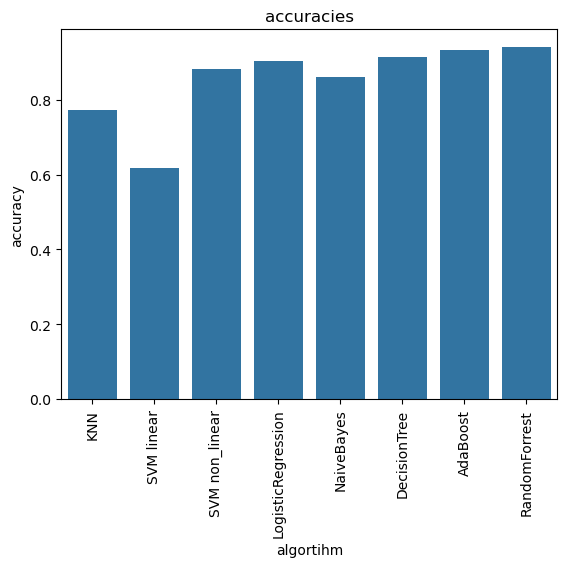

In [119]:
d = {
    "l" : oreder,
    "acc" : accuracies
    
}
ax = sns.barplot(x='l', y='acc', data=d)

# Set x-axis label rotation to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('accuracies')
plt.xlabel('algortihm')
plt.ylabel('accuracy')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5316\1868402088.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


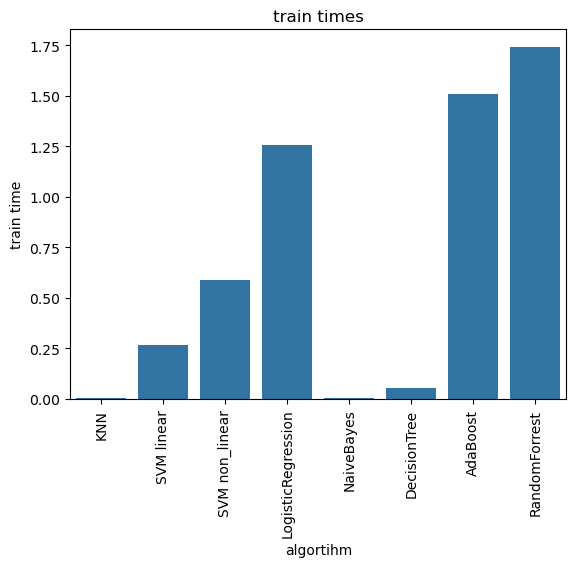

In [120]:
d = {
    "l" : oreder,
    "trt" : train_times
    
}
ax = sns.barplot(x='l', y='trt', data=d)

# Set x-axis label rotation to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('train times')
plt.xlabel('algortihm')
plt.ylabel('train time')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5316\3819797640.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


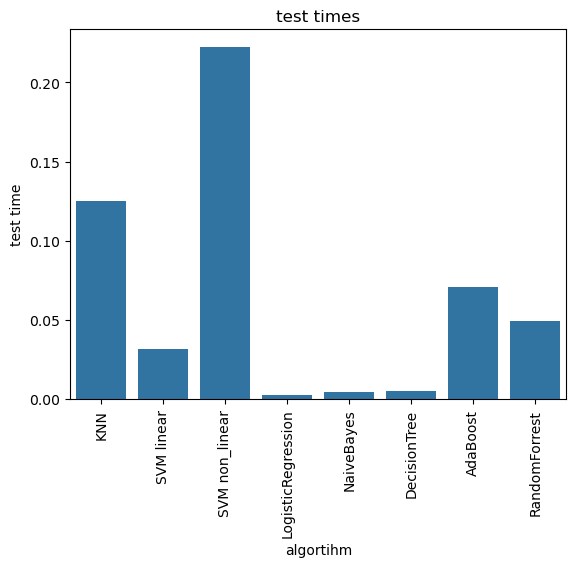

In [121]:
d = {
    "l" : oreder,
    "tet" : test_times
    
}
ax = sns.barplot(x='l', y='tet', data=d)

# Set x-axis label rotation to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('test times')
plt.xlabel('algortihm')
plt.ylabel('test time')
plt.show()

In [122]:
def create_dic(l, o):
    d = {}
    for index,item in enumerate(l):
        d[o[index]] = item
    return d

dtrt = create_dic(train_times, oreder)

dtEt = create_dic(test_times, oreder)

dacc = create_dic(accuracies, oreder)

print("For this  SPECIFIC dataset : ")
print()
print("train times :\n", dict(sorted(dtrt.items(), key=lambda item: item[1])))
print()
print("*"*300)
print("test times :\n", dict(sorted(dtEt.items(), key=lambda item: item[1])))
print()
print("*"*300)
print("accuracies :\n",  dict(sorted(dacc.items(), key=lambda item: item[1], reverse=True)))

For this  SPECIFIC dataset : 

train times :
 {'NaiveBayes': 0.005340576171875, 'KNN': 0.005997657775878906, 'DecisionTree': 0.054894208908081055, 'SVM linear': 0.26819419860839844, 'SVM non_linear': 0.5894958972930908, 'LogisticRegression': 1.255558967590332, 'AdaBoost': 1.5073988437652588, 'RandomForrest': 1.7425260543823242}

************************************************************************************************************************************************************************************************************************************************************************************************************
test times :
 {'LogisticRegression': 0.0025055408477783203, 'NaiveBayes': 0.004504203796386719, 'DecisionTree': 0.00514984130859375, 'SVM linear': 0.03130459785461426, 'RandomForrest': 0.048981666564941406, 'AdaBoost': 0.07058262825012207, 'KNN': 0.12496495246887207, 'SVM non_linear': 0.22241950035095215}

************************************************************

# conclusion 

# Training Time (Generally for all datasets ,Faster to Slower)

* Naive Bayes
* Logistic Regression
* Decision Tree
* K-Nearest Neighbors (KNN)
* AdaBoost
* Random Forest

# Test Time (Generally for all datasets ,Faster to Slower)

* Decision Tree
* Naive Bayes
* Logistic Regression
* K-Nearest Neighbors (KNN)
* AdaBoost
* Random Forest


# Accuracy Ranking (Generally for all datasets  ,High to Low)

* Random Forest - Highest Accuracy
* AdaBoost
* Logistic Regression
* Decision Tree
* K-Nearest Neighbors (KNN)
* Naive Bayes 


source : www.geeksforgeeks.com


In [123]:
data.columns

Index(['all', 'our', 'over', 'remove', 'internet', 'order', 'receive',
       'addresses', 'free', 'business', 'email', 'credit', '000', 'hp', 'hpl',
       '!', '$', 'longest', 'total', 'address', 'telnet', 'technology',
       'original', 'edu', 'average', 'font', 'cs', 'project', 'table', '[',
       '#', 'spam'],
      dtype='object')